In [1]:
import numpy as np
import pandas as pd

## 1. Load Data

In [2]:
jester_train=pd.read_csv("jester_train.csv")
jester_val=pd.read_csv("jester_val.csv")
jester_test=pd.read_csv("jester_test.csv")

In [3]:
jester_train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
jester_val.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
jester_test.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [4]:
jester_train.set_index('index', inplace=True)
jester_val.set_index('index', inplace=True)
jester_test.set_index('index', inplace=True)

### 1.1 Convert dataframe to matrices


In [5]:
jester_train

,user,joke,rating
index,,,
1067276,14785,68,7.62
2245073,31024,40,-9.51
1125980,15586,2,3.79
1254386,17313,40,5.92
452534,6278,28,2.62
...,...,...,...
840926,11653,37,8.69
1434376,19794,18,0.87
399816,5550,22,-9.37


#### 1.1.1 train set

In [6]:
jester_train.sort_index()
jester_train_df = jester_train.pivot_table(index="user", columns = "joke", values = "rating")
jester_train_df

joke,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,NaN,NaN,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,NaN,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,NaN,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73416,NaN,NaN,NaN,NaN,5.78,8.45,NaN,8.20,NaN,8.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73417,NaN,NaN,NaN,NaN,5.24,NaN,NaN,5.68,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73418,NaN,NaN,NaN,NaN,-3.93,NaN,-9.03,-2.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
jester_train_mat = jester_train_df.to_numpy()
jester_train_mat

array([[  nan,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [8]:
jester_train_df.head(5)

joke,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,NaN,NaN,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,NaN,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,NaN,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [9]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_train.user)))
print(jester_train_mat.shape)

73421
(73421, 100)


In [10]:
# create a mask for the subset of the data
jester_train_mask = ~np.isnan(jester_train_mat)
jester_train_mask

array([[False,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [11]:
np.sum(jester_train_mask)

3722724

#### 1.1.2. validation set

In [12]:
jester_val.sort_index()
jester_val_df = jester_val.pivot_table(index="user", columns = "joke", values = "rating", dropna=False)

In [13]:
# Some users are not included in the validation or test set, due to the small set size. Therefore, we need to merge
# the validation and test set with the complete list of users.
user_df = jester_train_df.reset_index()[['user']]

In [14]:
jester_val_df=pd.merge(user_df,jester_val_df.reset_index(),how='outer',on='user')
jester_val_df=jester_val_df.set_index('user')
jester_val_mat = jester_val_df.to_numpy()
jester_val_mat

array([[-7.82,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [15]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_val.user)))
print(jester_val_mat.shape)

64072
(73421, 100)


In [16]:
jester_val_mask = ~np.isnan(jester_val_mat)
np.sum(jester_val_mask)

206818

#### 1.1.3. test set

In [17]:
jester_test.sort_index()
jester_test_df = jester_test.pivot_table(index="user", columns = "joke", values = "rating")

In [18]:
jester_test_df=pd.merge(user_df,jester_test_df.reset_index(),how='outer',on='user')
jester_test_df=jester_test_df.set_index('user')
jester_test_mat = jester_test_df.to_numpy()
jester_test_mat

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [19]:
# sanity check: the number of unique users in the training set
print(len(np.unique(jester_test.user)))
print(jester_test_mat.shape)

63799
(73421, 100)


In [20]:
jester_test_mask = ~np.isnan(jester_test_mat)
np.sum(jester_test_mask)

206818

## 2. Analysis/Modeling

### 2.1 Biscale Centering

#### 2.1.1 Fitting

In [21]:
from fancyimpute import BiScaler

#Simple Additive Model
jester_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
jester_train_mat_centered = jester_biscaler.fit_transform(jester_train_mat)

[BiScaler] Initial log residual value = 13.262872
[BiScaler] Iter 1: log residual = 5.192479, log improvement ratio=8.070393
[BiScaler] Iter 2: log residual = 1.736193, log improvement ratio=3.456287
[BiScaler] Iter 3: log residual = -1.696396, log improvement ratio=3.432589
[BiScaler] Iter 4: log residual = -5.134444, log improvement ratio=3.438049
[BiScaler] Iter 5: log residual = -8.577467, log improvement ratio=3.443022
[BiScaler] Iter 6: log residual = -12.023553, log improvement ratio=3.446086
[BiScaler] Iter 7: log residual = -15.471356, log improvement ratio=3.447803
[BiScaler] Iter 8: log residual = -18.920092, log improvement ratio=3.448736
[BiScaler] Iter 9: log residual = -22.369327, log improvement ratio=3.449235
[BiScaler] Iter 10: log residual = -25.818829, log improvement ratio=3.449501
[BiScaler] Iter 11: log residual = -29.268472, log improvement ratio=3.449643
[BiScaler] Iter 12: log residual = -32.718190, log improvement ratio=3.449719
[BiScaler] Iter 13: log residu

In [22]:
# Access the alpha (row_mean) and beta (column) values
print(jester_biscaler.row_means)
print(jester_biscaler.column_means)

[-4.0563674   1.85670453  5.79481109 ...  0.07215497  7.62543926
  3.43792238]
[ 0.88002184  0.20335836  0.13702263 -1.55889359  0.40186422  1.25823208
 -0.46380327 -0.83410596 -0.7333004   1.09197592  1.62627459  1.43219241
 -1.78558413  1.27365104 -1.94791109 -2.94668858 -1.12632167 -0.74718082
  0.34680648 -1.04688869  2.15834856  0.8112097   0.19877532 -1.79468183
  0.36921514  1.21080079  3.08651889  1.30637789  2.76311129 -0.6111657
  2.10861963  2.99368551 -1.50666212  0.94009837  2.86634856  3.07307796
 -1.48786439  1.25753443  1.09564343  0.89781076 -0.50344346  1.85805695
 -0.87100265 -2.06095518  0.96145011  1.36589801  1.3208643   1.70460908
  2.53752982  3.4649919  -0.83649919 -0.21429342  2.73778281  2.4751548
  0.36123346  1.70920616 -2.03648926 -3.76712552 -0.6133534  -0.48995097
  2.07663486  2.7087872   0.15222045 -0.81232519  2.19909255  2.43293151
 -0.93635409  2.43329616  2.39146292  0.53851135 -1.21412516  2.42435842
  0.74915093 -1.78266829 -0.6912309   2.1342240

In [23]:
jester_train_mat

array([[  nan,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [24]:
jester_train_mat_centered

array([[        nan, 12.64300904, -5.74065522, ...,         nan,
                nan,         nan],
       [ 1.34327363, -2.35006289,  4.36627284, ..., -2.17977464,
        -5.92318683, -1.58272729],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

#### 2.1.2 Estimation

In [25]:
import copy
jester_centered_0 = copy.copy(jester_train_mat_centered)
jester_centered_0[np.isnan(jester_centered_0)]=0
jester_centered_0

array([[ 0.        , 12.64300904, -5.74065522, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34327363, -2.35006289,  4.36627284, ..., -2.17977464,
        -5.92318683, -1.58272729],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
jester_BiScaler_filled = jester_biscaler.inverse_transform(jester_centered_0)
jester_BiScaler_filled

array([[-3.17634556,  8.79      , -9.66      , ..., -3.3932973 ,
        -4.30988511, -3.26034464],
       [ 4.08      , -0.29      ,  6.36      , ...,  0.34      ,
        -4.32      ,  1.07      ],
       [ 6.67483293,  5.99816945,  5.93183372, ...,  6.4578812 ,
         5.54129338,  6.59083385],
       ...,
       [ 0.95217681,  0.27551333,  0.2091776 , ...,  0.73522508,
        -0.18136273,  0.86817773],
       [ 8.5054611 ,  7.82879763,  7.76246189, ...,  8.28850937,
         7.37192156,  8.42146202],
       [ 4.31794422,  3.64128074,  3.57494501, ...,  4.10099249,
         3.18440468,  4.23394514]])

### 2.2 Softimpute

In [27]:
from fancyimpute import SoftImpute
#Low rank Model
jester_soft_imputer = SoftImpute(max_rank=5, verbose=True)
jester_centered_filled = jester_soft_imputer.fit_transform(jester_train_mat_centered)

[SoftImpute] Max Singular Value of X_init = 1908.373865
[SoftImpute] Iter 1: observed MAE=2.999725 rank=5
[SoftImpute] Iter 2: observed MAE=2.935306 rank=5
[SoftImpute] Iter 3: observed MAE=2.912739 rank=5
[SoftImpute] Iter 4: observed MAE=2.902617 rank=5
[SoftImpute] Iter 5: observed MAE=2.904292 rank=5
[SoftImpute] Iter 6: observed MAE=2.888633 rank=5
[SoftImpute] Iter 7: observed MAE=2.880344 rank=5
[SoftImpute] Iter 8: observed MAE=2.883376 rank=5
[SoftImpute] Iter 9: observed MAE=2.878414 rank=5
[SoftImpute] Iter 10: observed MAE=2.875578 rank=5
[SoftImpute] Iter 11: observed MAE=2.869893 rank=5
[SoftImpute] Iter 12: observed MAE=2.871302 rank=5
[SoftImpute] Iter 13: observed MAE=2.866777 rank=5
[SoftImpute] Iter 14: observed MAE=2.862835 rank=5
[SoftImpute] Iter 15: observed MAE=2.871173 rank=5
[SoftImpute] Iter 16: observed MAE=2.870348 rank=5
[SoftImpute] Iter 17: observed MAE=2.865004 rank=5
[SoftImpute] Iter 18: observed MAE=2.861324 rank=5
[SoftImpute] Iter 19: observed MAE=

In [28]:
jester_centered_filled

array([[-0.12521402, 12.64300904, -5.74065522, ..., -1.63920491,
        -2.88134945, -3.8408655 ],
       [ 1.34327363, -2.35006289,  4.36627284, ..., -2.17977464,
        -5.92318683, -1.58272729],
       [ 0.20723428, -0.48576219,  1.11913623, ..., -0.64978042,
         1.14717554, -0.23374375],
       ...,
       [-0.44621976, -0.33289051, -1.8155387 , ..., -0.17996126,
        -0.43084546, -1.21593148],
       [ 0.22855003, -0.57376929,  1.11969765, ...,  0.10557427,
         1.1095433 ,  0.62926806],
       [ 2.01936331,  2.16723097,  2.27067796, ..., -1.44849029,
        -0.26966165, -1.00607511]])

In [29]:
jester_SoftImpute_filled = jester_biscaler.inverse_transform(jester_centered_filled)
jester_SoftImpute_filled = np.clip(jester_SoftImpute_filled, -10, 10)
jester_SoftImpute_filled

array([[-3.30155959,  8.79      , -9.66      , ..., -5.03250221,
        -7.19123456, -7.10121014],
       [ 4.08      , -0.29      ,  6.36      , ...,  0.34      ,
        -4.32      ,  1.07      ],
       [ 6.8820672 ,  5.51240726,  7.05096995, ...,  5.80810077,
         6.68846893,  6.3570901 ],
       ...,
       [ 0.50595705, -0.05737718, -1.6063611 , ...,  0.55526382,
        -0.61220819, -0.34775375],
       [ 8.73401113,  7.25502834,  8.88215954, ...,  8.39408364,
         8.48146486,  9.05073008],
       [ 6.33730753,  5.80851171,  5.84562297, ...,  2.6525022 ,
         2.91474303,  3.22787004]])

### 2.3 Get test set performance

In [30]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

### 2.3.1 Performance with Biscale centering only

In [31]:
jester_test_mae = masked_mae(jester_test_mat, jester_BiScaler_filled, jester_test_mask)
print("Biscale MAE %s " % (jester_test_mae/20)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

jester_test_mse = masked_mse(jester_test_mat, jester_BiScaler_filled, jester_test_mask)
print("Biscale RMSE %s " % (np.sqrt(jester_test_mse)/20))

baseline_pred = np.mean(jester_train)[2]
baseline_model = baseline_pred*np.ones((73421, 100))
baseline_mse = masked_mse(jester_test_mat, baseline_model, jester_test_mask)
print("Biscale R2 %s" % OSR2(jester_test_mse, baseline_mse))

Biscale MAE 0.17353275658553807 
Biscale RMSE 0.21883777452833306 
Biscale R2 0.31809089580305727


In [32]:
jester_test_mae = masked_mae(jester_test_mat, jester_SoftImpute_filled, jester_test_mask)
print("SoftImpute MAE %s " % (jester_test_mae/20)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

jester_test_mse = masked_mse(jester_test_mat, jester_SoftImpute_filled, jester_test_mask)
print("SoftImpute RMSE %s " % (np.sqrt(jester_test_mse)/20))

baseline_pred = np.mean(jester_train)[2]
baseline_model = baseline_pred*np.ones((73421, 100))
baseline_mse = masked_mse(jester_test_mat, baseline_model, jester_test_mask)
print("SoftImpute R2 %s" % OSR2(jester_test_mse, baseline_mse))

SoftImpute MAE 0.16105887423913895 
SoftImpute RMSE 0.21066496036101126 
SoftImpute R2 0.3680735675887147


### 2.4 Cross-validation to choose the best number of Archetypal Users

In [36]:
jester_val_mae_lst = []
for i in range(20):
    param_cv = i+1
    jester_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    jester_centered_filled_cv = jester_soft_imputer_cv.fit_transform(jester_train_mat_centered)
    jester_filled_cv = jester_biscaler.inverse_transform(jester_centered_filled_cv)
    jester_filled_cv = np.clip(jester_filled_cv, -10, 10)
    jester_val_mae_cv = masked_mae(jester_val_mat, jester_filled_cv, jester_val_mask)
    jester_val_mae_lst.append(jester_val_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, jester_val_mae_cv))

iter 1 - Validation MAE 3.365639577413716
iter 2 - Validation MAE 3.308209814993523
iter 3 - Validation MAE 3.254391685286129
iter 4 - Validation MAE 3.233043499675966
iter 5 - Validation MAE 3.2262638564477073
iter 6 - Validation MAE 3.2372330287760183
iter 7 - Validation MAE 3.2493346400394136
iter 8 - Validation MAE 3.2485968340636755
iter 9 - Validation MAE 3.294785485820863
iter 10 - Validation MAE 3.3040010237457884
iter 11 - Validation MAE 3.31572511002251
iter 12 - Validation MAE 3.3476887414457024
iter 13 - Validation MAE 3.363088855317898
iter 14 - Validation MAE 3.4058464823726737
iter 15 - Validation MAE 3.4216771235904293
iter 16 - Validation MAE 3.4512394834145335
iter 17 - Validation MAE 3.48502889535236
iter 18 - Validation MAE 3.5124620326616767
iter 19 - Validation MAE 3.516989230889346
iter 20 - Validation MAE 3.5434682909342863


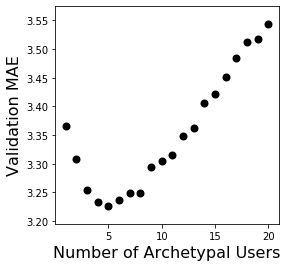

In [38]:
import matplotlib.pyplot as plt
x = range(1,21)
y = jester_val_mae_lst
plt.figure(figsize=(4, 4))
plt.scatter(x, y, linewidth=2, color='black')
plt.xlabel('Number of Archetypal Users', fontsize=16)
plt.ylabel('Validation MAE', fontsize=16)
plt.show()